In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def firstODE(t,y):
    return np.array([np.cos(t)*y + np.sin(2*t)])

In [3]:
# define ODE first order where f(t,y) = y'
def secondODE(t,y):
    w = 4*np.pi
    z = 0.06
    A = np.array([[0,1],
             [-w**2, -2*z*w]])
    return A@y

In [4]:
def RK4(func, t_init, t_end, y0, dt):
    
    t = np.linspace(t_init, t_end, int((t_end-t_init)/dt)+1)
        #creating a time-coordinate.
        #can also be done simpler as t = np.arange(t_init, t_end + dt, dt)
        #but chatgpt insists this is better.
    intv = len(t)

    y0 = np.atleast_1d(y0).astype(float)
    y = np.zeros((len(y0),intv), dtype = float)
        # no. rows is the number of states;
        # no. columns is the time series to be filled.
    y[:,0] = y0 #assigns the initial value of states.
    for i in range(intv - 1):
        k1 = func(t[i],  y[:,i])
        k2 = func(t[i] + dt/2, y[:,i] + dt*k1/2)
        k3 = func(t[i] + dt/2, y[:,i] + dt*k2/2)
        k4 = func(t[i] + dt,   y[:,i] + dt*k3)
        y[:,i+1] = y[:,i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, y 


In [18]:
def RKDP45(func, t_init, t_end, y0, dt0=0.01, rtol=1e-6, atol=1e-9):
    #setting up initial time, time step and initial value.
    y0 = np.atleast_1d(y0).astype(float)
    t = t_init
    dt = dt0
    y = y0.copy()

    t_span = [t]
    y_span = [y.copy()]

    while t < t_end:
        if t + dt > t_end:
            dt = t_end - t #so that the final step doesn't offshoot range.

        # calculate 7 slopes with nodes and coefficients
        k1 = func(t, y)
        k2 = func(t + dt/5,
                y + dt*k1/5)
        k3 = func(t + dt*3/10,
                y + dt*(k1*3/40 + k2*9/40))
        k4 = func(t + dt*4/5,
                y + dt*(k1*44/45 - k2*56/15 + k3*32/9))
        k5 = func(t + dt*8/9,
                y + dt*(k1*19372/6561 - k2*25360/2187 + 
                        k3*64448/6561 - k4*212/729))
        k6 = func(t + dt,
                y + dt*(k1*9017/3168 - k2*355/33 + 
                        k3*46732/5247 + k4*49/176 - k5*5103/18656))
        k7 = func(t + dt,
                y + dt*(k1*35/384 - k2*0 + k3*500/1113 +
                        k4*125/192 - k5*2187/6784 + k6*11/84))
        
        #calculate the increment functions
        S5 = (k1*35/384 - k2*0 + k3*500/1113 + k4*125/192 - 
            k5*2187/6784 + k6*11/84 + k7*0)
        S4 = (k1*5179/57600 - k2*0 + k3*7571/16695 + k4*393/640 - 
            k5*92097/339200 + k6*187/2100 + k7*1/40)
        
        #calculate the fifth and fourth order solutions
        y5 = y + S5*dt
        y4 = y + S4*dt

        #calculate the error and tolerance
        E = np.linalg.norm(y5 - y4, ord=np.inf)
        tol = atol + rtol * np.linalg.norm(y5, ord=np.inf)
        if E <= tol: 
            t = t + dt
            y = y5
            t_span.append(t)
            y_span.append(y.copy())
        
        if E == 0: 
            s = 2 
        else: 
            s = 0.9* (tol/E)**0.2
        
        dt = dt*np.clip(s,0.2,5.0)
    return np.array(t_span), np.array(y_span).T
    

In [26]:
def lorenz(t,y, sigma=10,beta=8/3,rho=28):
    dydt = np.array([
        sigma*(y[1] - y[0]),
        y[0]*(rho - y[2]) - y[1],
        y[0]*y[1] - beta*y[2]]
        )
    return dydt

Text(0.5, 0, 'z')

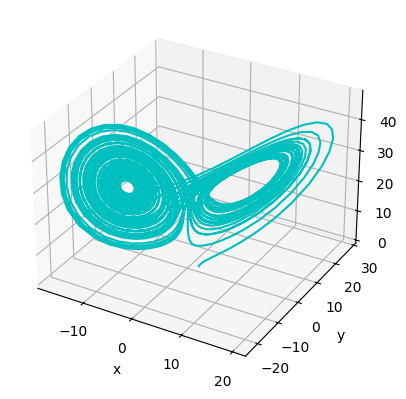

In [35]:
sol1 = RKDP45(func = lorenz, t_init = 0, t_end = 50,
             y0 = [2,1,0], dt0=0.01)
time1 = sol1[0]
x_traj1 = sol1[1][0]
y_traj1 = sol1[1][1]
z_traj1 = sol1[1][2]
traj1 = plt.figure().add_subplot(projection = '3d')
traj1.plot(x_traj1,y_traj1,z_traj1, 'c')
traj1.set_xlabel("x")
traj1.set_ylabel("y")
traj1.set_zlabel("z")


Text(0.5, 0, 'z')

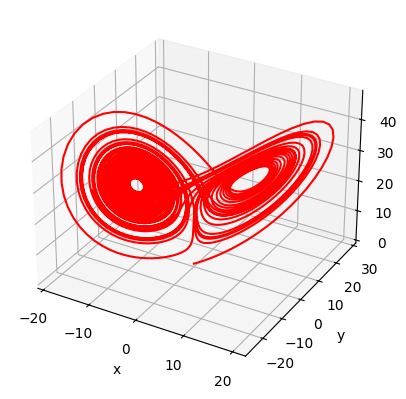

In [34]:
sol = RK4(func = lorenz, t_init = 0, t_end = 50,
           y0 = [0,0.02,0], dt = 0.01)
time = sol[0]
x_traj = sol[1][0]
y_traj = sol[1][1]
z_traj = sol[1][2]
traj = plt.figure().add_subplot(projection = '3d')
traj.plot(x_traj,y_traj,z_traj, 'r')
traj.set_xlabel("x")
traj.set_ylabel("y")
traj.set_zlabel("z")